# Car price predcition

#### Loading necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats


#### Loadingb the dataset

In [2]:
df = pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [6]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [7]:
df.rename(columns={'__year_resale_value':'year_resale_value'},inplace=True)

In [8]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

#### Filling null values using mean

In [9]:
df.Price_in_thousands.interpolate(inplace=True)

In [10]:
df.fillna(df.mean(),inplace= True)

In [11]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
year_resale_value     0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

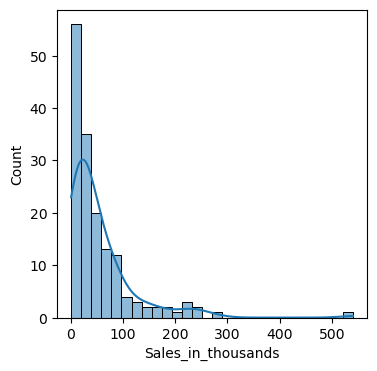

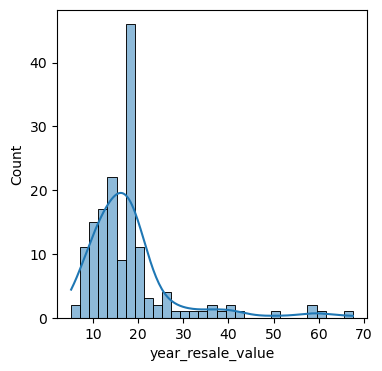

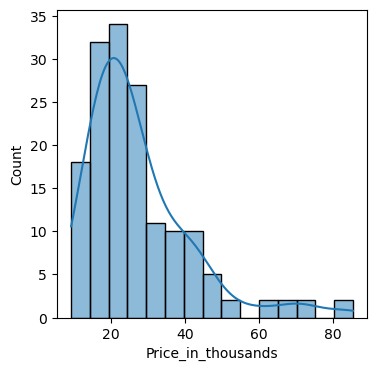

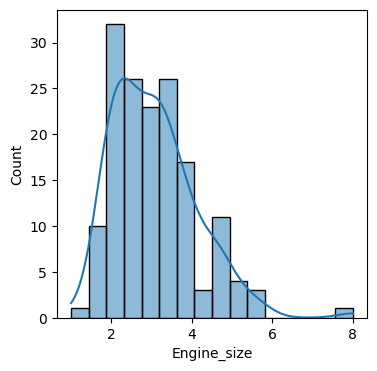

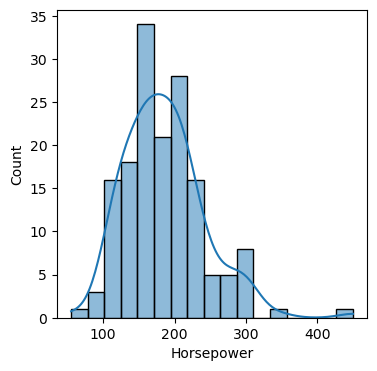

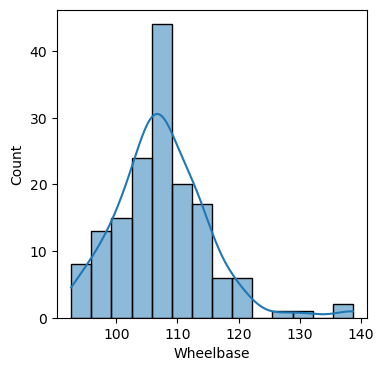

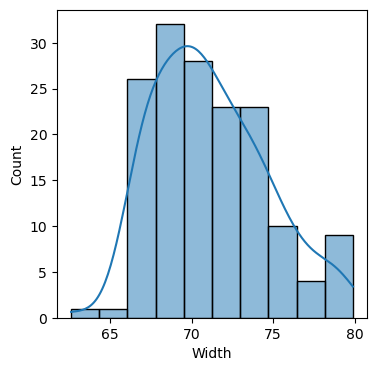

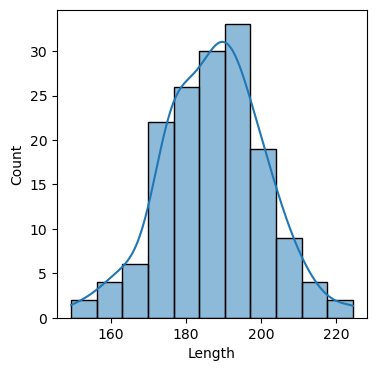

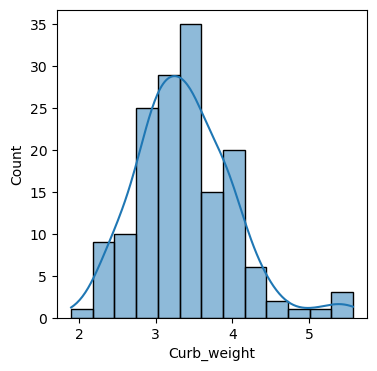

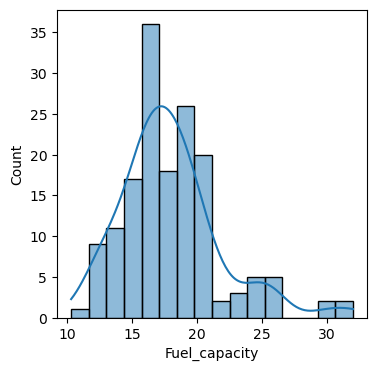

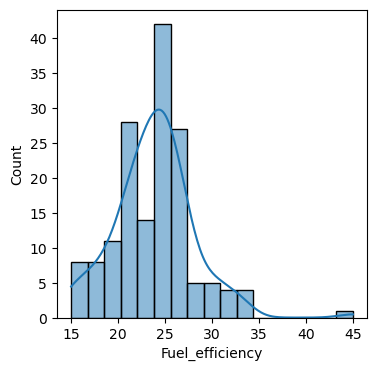

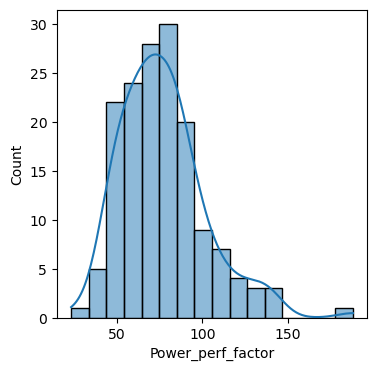

In [12]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.figure( figsize=(4,4))
        sns.histplot( data= df, x = df[i] , kde =True)
        plt.show()

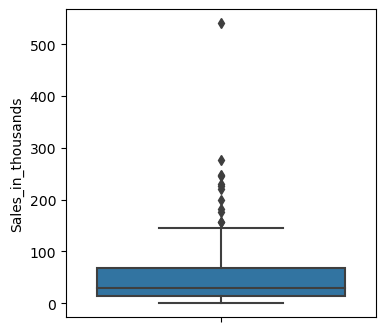

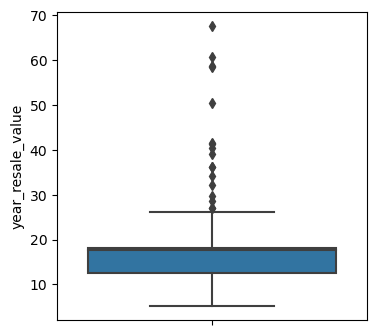

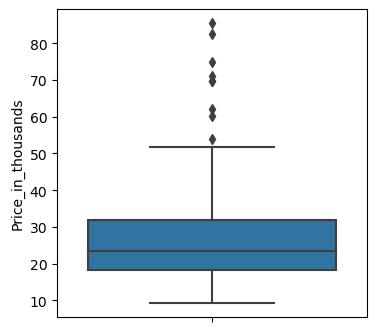

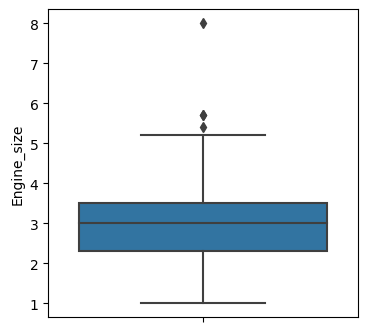

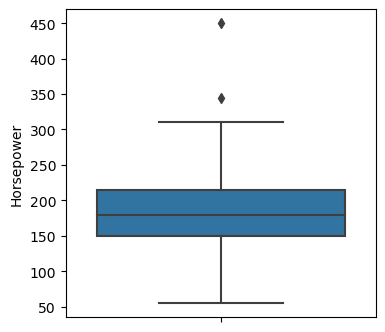

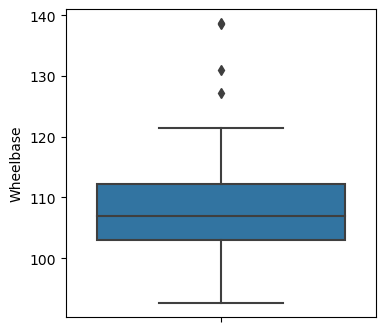

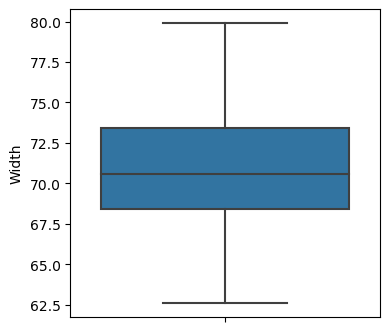

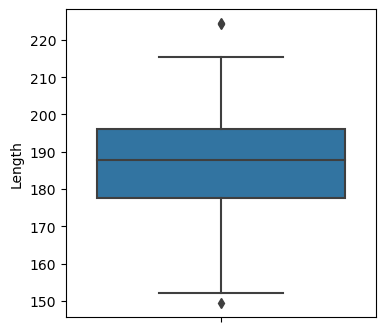

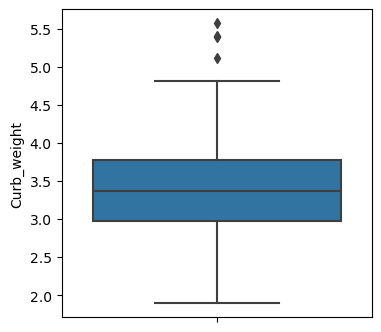

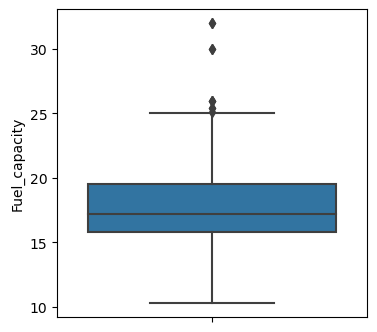

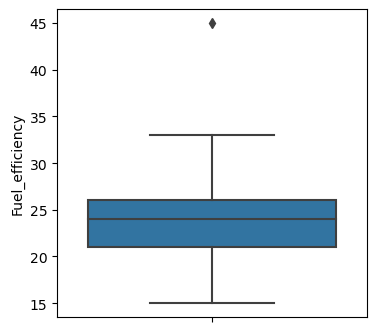

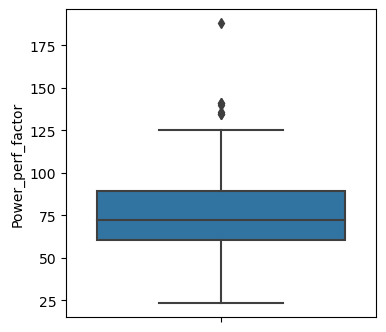

In [13]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.figure( figsize=(4,4))
        sns.boxplot(y =df [i])
        plt.show()

#### Label Encoding categorical columns-Vehicle type

In [14]:
le = LabelEncoder()

In [15]:
df['Vehicle_type'] = le.fit_transform(df.Vehicle_type)

In [16]:
df.head(4)

,Manufacturer,Model,Sales_in_thousands,year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,1,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,1,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,1,35.2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725,1,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


<AxesSubplot:ylabel='Price_in_thousands'>

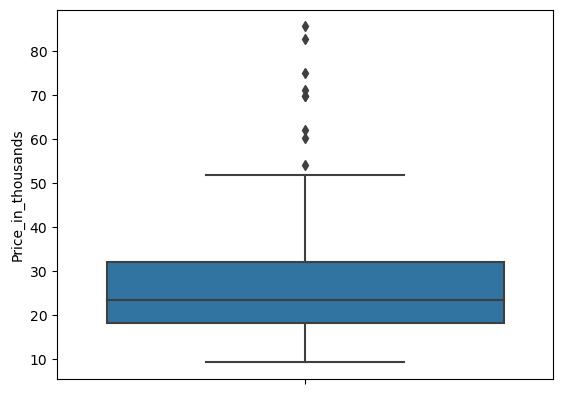

In [17]:
sns.boxplot(data =df , y ='Price_in_thousands')

In [18]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 -1.5*IQR
    return UL,LL

In [19]:
UL, LL = outlier_limit(df.Price_in_thousands)
df['Price_in_thousands'] = np.where((df.Price_in_thousands>UL) | (df.Price_in_thousands<LL),\
                                    np.nan,df.Price_in_thousands)

In [20]:
df.head(3)

,Manufacturer,Model,Sales_in_thousands,year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,1,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,1,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,1,35.2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591


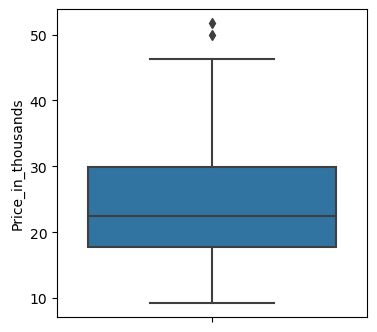

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(data = df, y =df.Price_in_thousands)
plt.show()

In [22]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
year_resale_value     0
Vehicle_type          0
Price_in_thousands    9
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
year_resale_value     0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

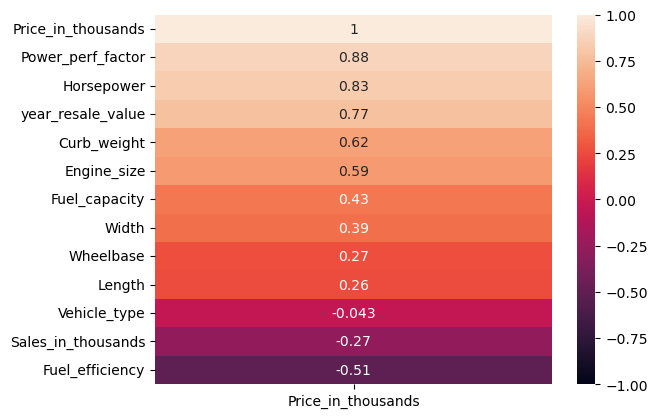

In [25]:
sns.heatmap(df.corr()[['Price_in_thousands']].sort_values\
            (by= ['Price_in_thousands'],ascending=False),vmin =-1, vmax =1,annot=True)
plt.show()

In [26]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [188]:
x = df [['Power_perf_factor','Horsepower','Curb_weight']].values

In [189]:
y = df['Price_in_thousands'].values

#### Feature Scaling

In [190]:
rs= RobustScaler()

In [191]:
x = rs.fit_transform(x)

#### Model building

In [192]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0),
    'Ridge':Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'LinearSVR':LinearSVR()
}

In [193]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv =10 , n_jobs = 4)
    print("cross validation score is :{}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print('Average RMSE is:', rmse_avg)
    print('*'*80)

cross validation score is :LinearRegression
Average RMSE is: 2.8908957430540974
********************************************************************************
cross validation score is :Lasso
Average RMSE is: 4.81663807450816
********************************************************************************
cross validation score is :RandomForestRegressor
Average RMSE is: 4.133510716211616
********************************************************************************
cross validation score is :Ridge
Average RMSE is: 4.083675379264574
********************************************************************************
cross validation score is :GradientBoostingRegressor
Average RMSE is: 3.8974577625301023
********************************************************************************
cross validation score is :AdaBoostRegressor
Average RMSE is: 4.437149220977328
********************************************************************************
cross validation score is :DecisionTreeRegress

In [194]:
lr =LinearRegression()

In [195]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size= 0.2, \
                                                shuffle=True, random_state= 50)

In [196]:
lr.fit(x_train,y_train)

LinearRegression()

In [197]:
lr.score(x_test,y_test)

0.9498619881810108

In [198]:
lr.score(x_train,y_train)

0.8590106626302891

In [199]:
y_pred =lr.predict(x_test)

In [200]:
r2_score(y_test,y_pred)

0.9498619881810108

In [201]:
mean_absolute_error(y_test,y_pred)

1.994919150413549

In [116]:
mean_squared_error(y_test,y_pred)

2.8325365570135797e-28

In [146]:
output =pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'], dtype=float)

#### Plot for final model

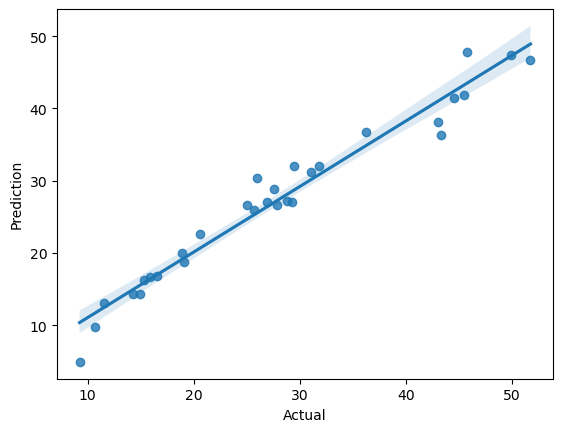

In [147]:
sns.regplot( data = output, x ='Actual',y= 'Prediction')
plt.show()